(tensor-network-contraction)=

# Contraction

One of the core tasks of any tensor network algorithm is *contracting* a
network of tensors into the single tensor, be it a scalar or a
multi-dimensional, that it implicitly represents.


one of the core tasks of any tensor network algorithm: collection of tensors -> single tensor defined as sum of products
$$
T_{\{ e_\mathrm{out} \}} = \sum_{ \{ e\} / \{ e_\mathrm{out} \} }  \prod_v T^{[v]}_{\{ e_v \}}
$$

exponentially slow to do sum directly since we would have evaluate every single
combination of index value assignments.

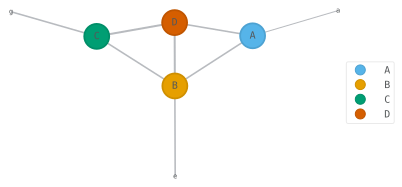

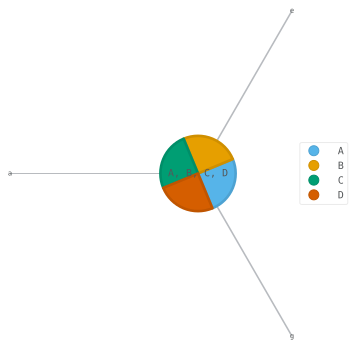

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn

ts = (
    qtn.rand_tensor([2, 3, 3], ['a', 'b', 'c'], 'A'),
    qtn.rand_tensor([3, 3, 3, 4], ['c', 'd', 'e', 'f'], 'B'),
    qtn.rand_tensor([3, 3, 4], ['d', 'g', 'h'], 'C'),
    qtn.rand_tensor([4, 3, 4], ['h', 'b', 'f'], 'D'),
)
tn = qtn.TensorNetwork(ts)

tn.draw(['A', 'B', 'C', 'D'])
tn.contract().draw(['A', 'B', 'C', 'D'])

Instead pairwise path of intermediates always best cost wise -> contracting a
pair of tenosrs can remove indices entirely from the rest of the contraction

specified by "contraction tree", cost is incredibly sensitive
to the choice and the space of these trees is very large -> tricky problem,
but can be automated.

Tradeoff between time spent finding the path and the time spent actually doing
the contraction.

The `optimize` kwarg.


## contraction interfaces

* [`qtn.tensor_contract`](quimb.tensor.tensor_core.tensor_contract)
* [`ta @ tb`](quimb.tensor.tensor_core.Tensor.__matmul__)
  for simple two tensor contract
* [`TensorNewtork.contract`](quimb.tensor.tensor_core.TensorNetwork.contract)

special forms of contraction

* [`TensorNetwork.contract_tags`](quimb.tensor.tensor_core.TensorNetwork.contract_tags)
* [`TensorNetwork.contract_between`](quimb.tensor.tensor_core.TensorNetwork.contract_between)
* [`TensorNetwork.contract_ind`](quimb.tensor.tensor_core.TensorNetwork.contract_ind)
* [`TensorNetwork.contract_cumulative`](quimb.tensor.tensor_core.TensorNetwork.contract_cumulative)
* [`TensorNetwork.to_dense`](quimb.tensor.tensor_core.TensorNetwork.to_dense)
* [`TensorNetwork.trace`](quimb.tensor.tensor_core.TensorNetwork.trace)

And information methods:

* [`TensorNetwork.contraction_path`](quimb.tensor.tensor_core.TensorNetwork.contraction_path)
  : the [`opt_einsum`](https://optimized-einsum.readthedocs.io) path
* [`TensorNetwork.contraction_info`](quimb.tensor.tensor_core.TensorNetwork.contraction_info)
  : the `opt_einsum.PathInfo` object
* [`TensorNetwork.contraction_tree`](quimb.tensor.tensor_core.TensorNetwork.contraction_tree)
  : the `cotengra.ContractionTree` object
* [`TensorNetwork.contraction_width`](quimb.tensor.tensor_core.TensorNetwork.contraction_width)
  : log2 of the maximum size of any intermediate tensor.
* [`TensorNetwork.contraction_cost`](quimb.tensor.tensor_core.TensorNetwork.contraction_cost)
  : the total number of scalar operations required to perform the contraction

called within many algorithms (wherever you see the `optimize` kwarg)


## Things you can supply to the `optimize` kwarg:


### `str` preset



### `cotengra` `HyperOptimizer`

### `opt_einsum` `PathOptimizer`


### explicit contraction path

### path, ssa_path, tree


### path caching

geometry hash

caching within cotengra


## Hyper edges

most general einsum equation


## Structured Contractions

e.g. 1D chain


## Approximate boundary contraction

coarse graining contractions

hyper edges not supported


## Automatic approximate / compressed contraction

* contract_copmressed
* contract_around